# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [27]:
def apply_svd_custom(X_train, X_test, n_components):
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean
    
    covariance_matrix = np.cov(X_train_centered, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]

    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    X_train_svd = np.dot(X_train_centered, selected_eigenvectors)
    X_test_svd = np.dot(X_test_centered, selected_eigenvectors)

    return X_train_svd, X_test_svd, selected_eigenvectors



## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [31]:
# Initialize svd_components
svd_components = [50, 100, 200, 300, 500, 784]

# Store the results and components for later visualization
results = []
components_list = []  # <-- 这里初始化 components_list

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, components = apply_svd_custom(X_train, X_test, n_components)
    
    # Store components for visualization later
    components_list.append((n_components, components))  # Append components to the list
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...
Selected 50 components:
X_train_svd shape: (56000, 50)
X_test_svd shape: (14000, 50)
Components shape: (784, 50)
SVD components: 50, Accuracy: 0.9080, Training time: 7.3188 seconds
Applying custom SVD with 100 components...
Selected 100 components:
X_train_svd shape: (56000, 100)
X_test_svd shape: (14000, 100)
Components shape: (784, 100)
SVD components: 100, Accuracy: 0.9181, Training time: 24.1154 seconds
Applying custom SVD with 200 components...
Selected 200 components:
X_train_svd shape: (56000, 200)
X_test_svd shape: (14000, 200)
Components shape: (784, 200)
SVD components: 200, Accuracy: 0.9206, Training time: 55.3538 seconds
Applying custom SVD with 300 components...
Selected 300 components:
X_train_svd shape: (56000, 300)
X_test_svd shape: (14000, 300)
Components shape: (784, 300)
SVD components: 300, Accuracy: 0.9206, Training time: 98.7430 seconds
Applying custom SVD with 

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


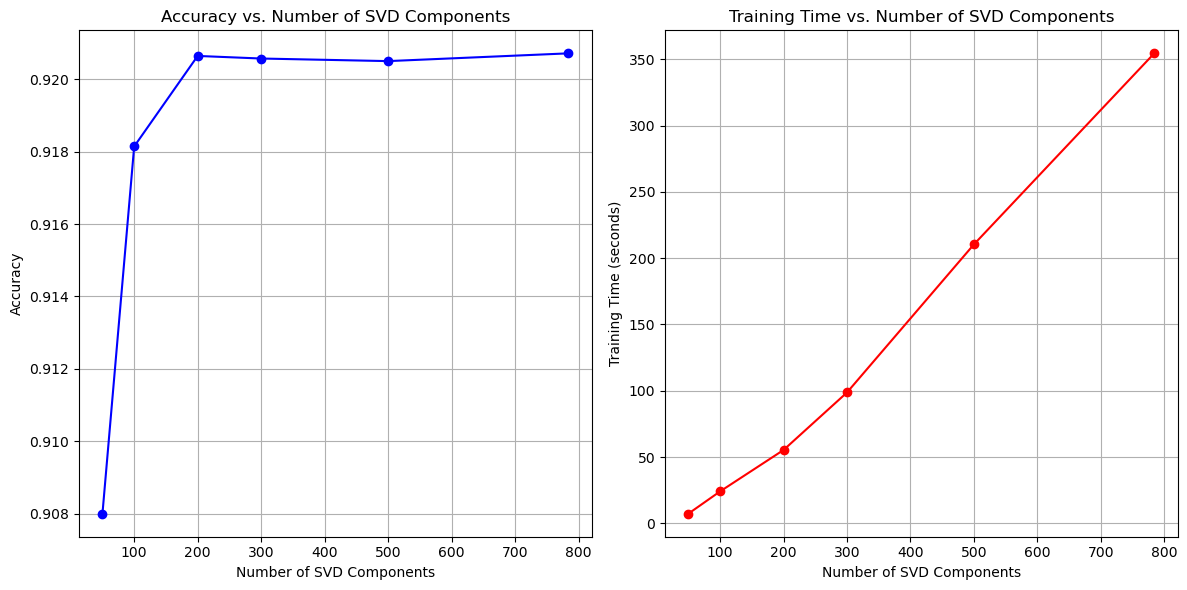

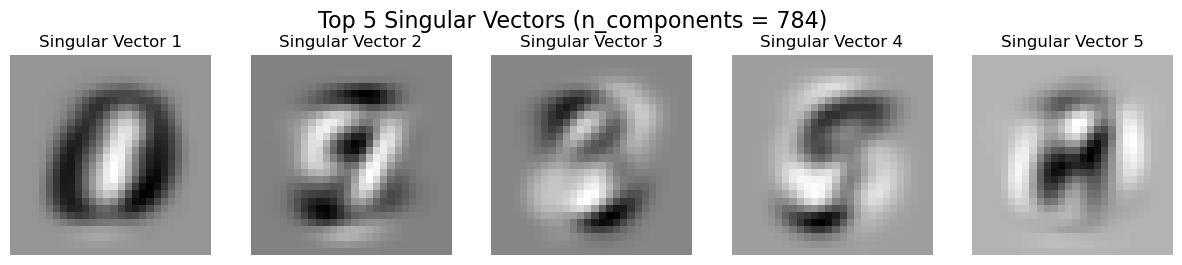

In [34]:
import matplotlib.pyplot as plt

components, accuracies, times = zip(*results)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', label='Accuracy', color='b')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o', label='Training Time', color='r')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

largest_n_components = components_list[-1][1]
top_5_vectors = largest_n_components[:, :5]

plt.figure(figsize=(15, 3))
for i in range(5):
    vector = top_5_vectors[:, i]
    image = vector.reshape(28, 28)
    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')

plt.suptitle(f'Top 5 Singular Vectors (n_components = {components[-1]})', fontsize=16)
plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER:  200 components provided the best balance between accuracy and training time. Increasing the number of components beyond 200 only slightly improved accuracy but significantly increased the training time, making 200 components the optimal choice.